# TASK 02

In [1]:
# Import pandas
import pandas as pd

# Read csv file
df = pd.read_csv('C:/Users/PMLS/OneDrive/Desktop/titanic/train.csv')

# Display first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [2]:
# Check missing values
print("Missing Values per Column:")
print(df.isnull().sum())

Missing Values per Column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### 1. Handle missing values (e.g., fill or drop)

In [3]:
# Check if 'Age' exists and has at least one non-null value
if 'Age' in df.columns and df['Age'].notnull().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
else:
    df['Age'] = df['Age'].fillna(30)  # or some safe default

# Drop Cabin if exists
if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis=1)

# Fill 'Embarked' if any missing
if 'Embarked' in df.columns and df['Embarked'].isnull().sum() > 0:
    df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [4]:
# Confirm missing values are handled
print("\nRemaining missing values:")
print(df.isnull().sum())


Remaining missing values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### 2. Convert categorical columns to numeric (e.g., gender, class)

In [5]:
# Preprocess
df['Age'] = df['Age'].fillna(df['Age'].median())

if 'Cabin' in df.columns:
    df = df.drop('Cabin', axis = 1)

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop unnecessary text columns
df = df.drop(['Name', 'Ticket'], axis = 1)

# Convert 'Sex' to numerical: male = 0, female = 1
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' using one-hot encoding
df = pd.get_dummies(df, columns = ['Embarked'], drop_first = True)

# Convert boolean dummies to integers
df[['Embarked_Q', 'Embarked_S']] = df[['Embarked_Q', 'Embarked_S']].astype(int)

# Show result
print(df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  


### 3. Plot survival rates by gender and class using matplotlib or seaborn

In [6]:
# Install libraries first
!pip install seaborn matplotlib

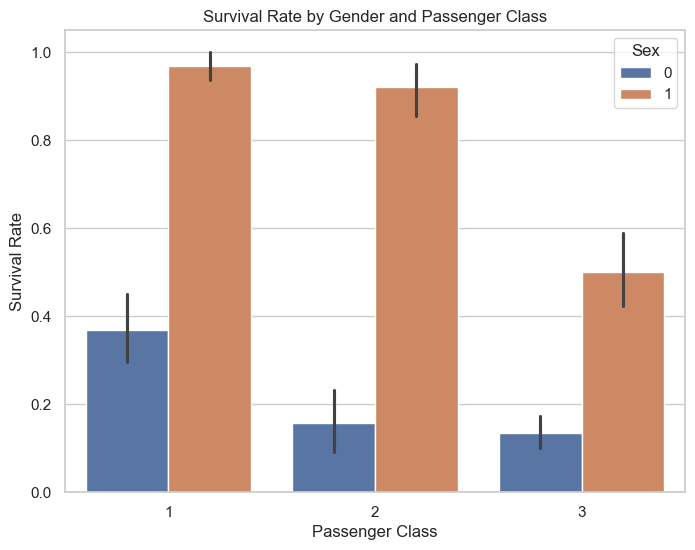

In [7]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style
sns.set(style = "whitegrid")

# Create a new figure
plt.figure(figsize = (8, 6))

# Plot survival rates by gender and class
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df)

# Add title and labels
plt.title('Survival Rate by Gender and Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Show the plot
plt.show()